In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
from typing import Counter

In [31]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /Users/ardan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ardan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/ardan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# Data Gathering

In [32]:
df = pd.read_csv('final_perfume_data.csv', encoding = 'unicode_escape')
df.head()

,Name,Brand,Description,Notes,Image URL
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...","Vanilla bean, musks",https://static.luckyscent.com/images/products/...
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,"Lavender, Yuzu, Lemongrass, Magnolia, Geraniu...",https://static.luckyscent.com/images/products/...
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,"Green yuzu, green shikuwasa, sansho seed, cor...",https://static.luckyscent.com/images/products/...
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,"tangerine, pink pepper, black coffee, leat...",https://static.luckyscent.com/images/products/...
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"Bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         2191 non-null   object
 1   Brand        2191 non-null   object
 2   Description  2191 non-null   object
 3   Notes        2111 non-null   object
 4   Image URL    2191 non-null   object
dtypes: object(5)
memory usage: 85.7+ KB


# Data Understanding

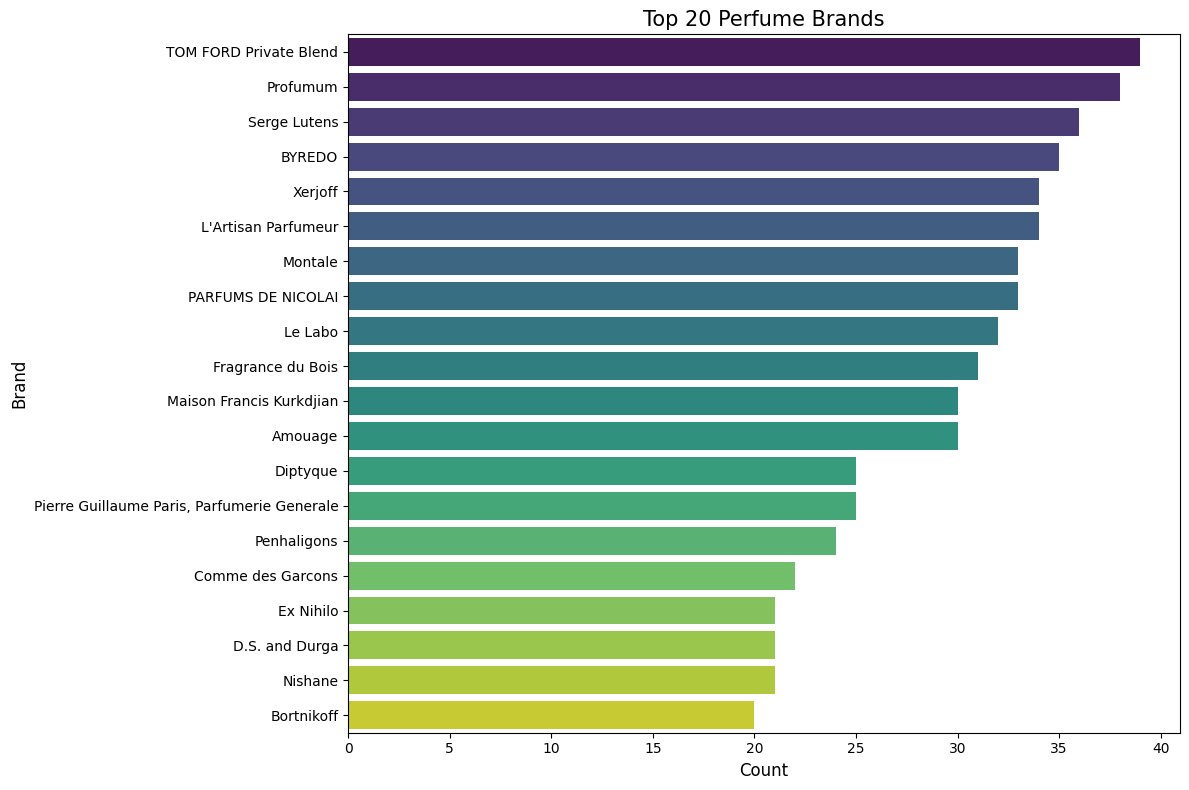

Persentase parfum dari 20 brand teratas: 26.65%


In [34]:
# Menampilkan distribusi merek parfum teratas
plt.figure(figsize=(12, 8))
brand_counts = df['Brand'].value_counts().head(20)
sns.barplot(x=brand_counts.values, y=brand_counts.index, hue=brand_counts.index, palette='viridis', legend=False)
plt.title('Top 20 Perfume Brands', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.tight_layout()
plt.show()

# Menghitung persentase dari total untuk brand terpopuler
top_brands_percentage = (brand_counts.sum() / len(df)) * 100
print(f"Persentase parfum dari 20 brand teratas: {top_brands_percentage:.2f}%")

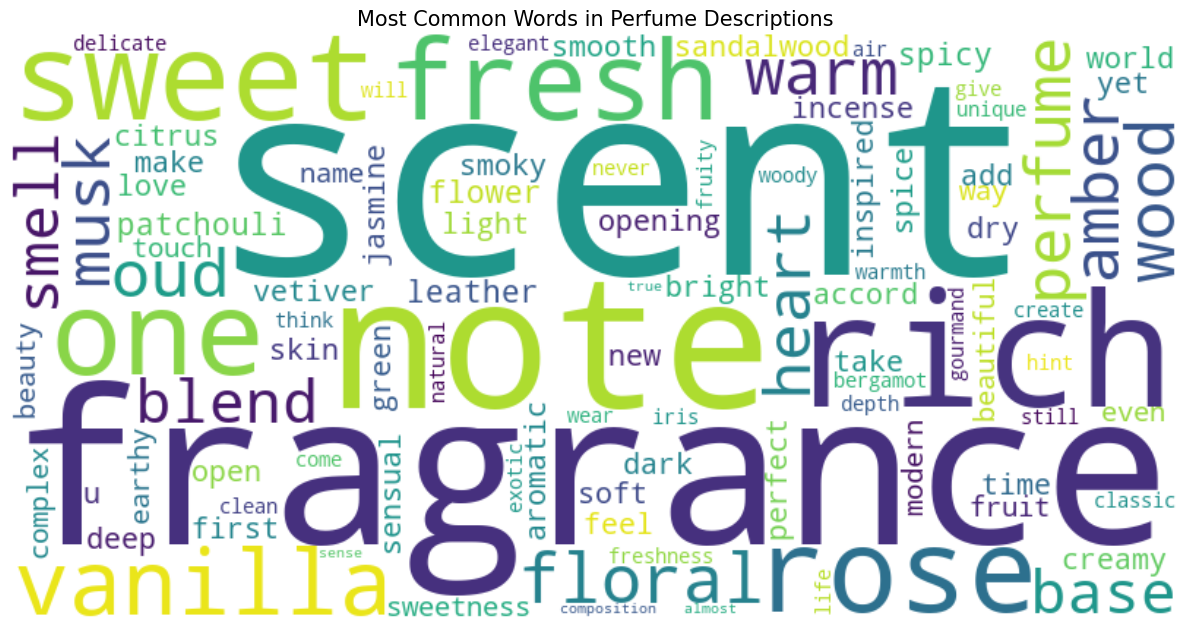

In [35]:
# Generate wordcloud dari kolom Description
from wordcloud import WordCloud

# Gabungkan semua deskripsi
all_descriptions = ' '.join(df['Description'].dropna())

# Buat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_descriptions)

# Tampilkan wordcloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Perfume Descriptions', fontsize=15)
plt.tight_layout()
plt.show()

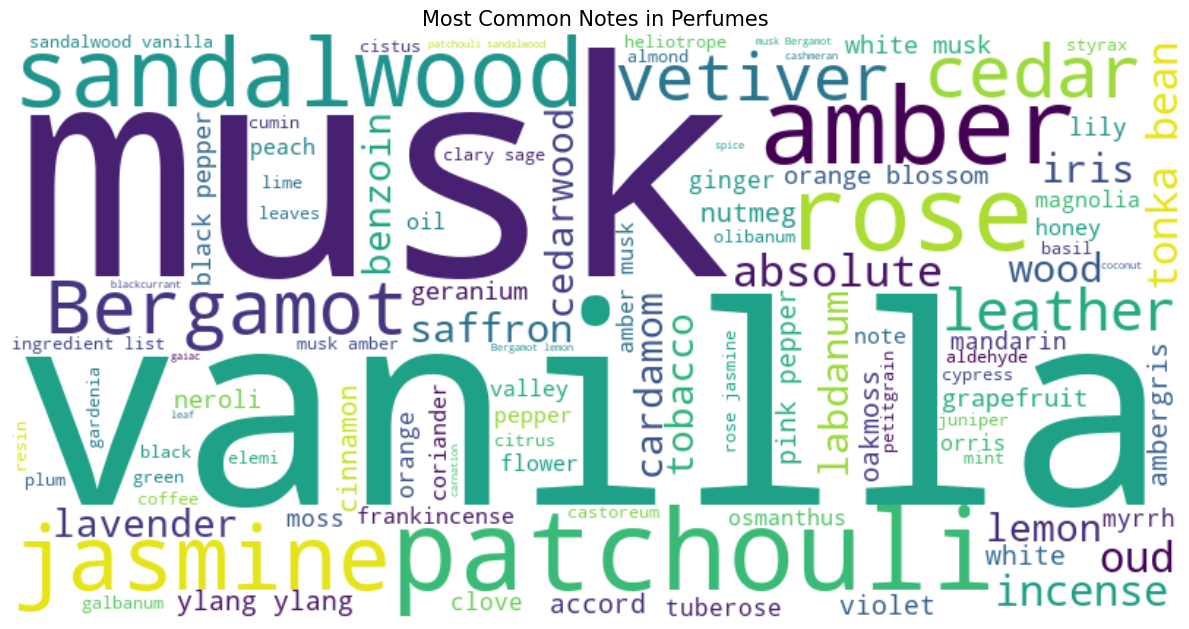

In [36]:
# Generate wordcloud dari kolom Notes
all_notes = ' '.join(df['Notes'].dropna())

# Buat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_notes)

# Tampilkan wordcloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Notes in Perfumes', fontsize=15)
plt.tight_layout()
plt.show()

In [37]:
# Define a new function that processes all notes without relying on explicit labels
def process_all_notes(df):
    # Get all notes as a single string
    all_notes = ', '.join(df['Notes'].dropna().astype(str))
    
    # Clean and tokenize
    all_notes = re.sub(r'[^\w\s,]', '', all_notes.lower())
    all_notes_list = [note.strip() for note in all_notes.split(',')]
    
    # Count frequencies
    from collections import Counter
    notes_counter = Counter(all_notes_list)
    
    # Get top 15
    return notes_counter.most_common(15)

In [38]:
# Plot the most common notes overall
all_notes_freq = process_all_notes(df)
all_notes_df = pd.DataFrame(all_notes_freq, columns=['Note', 'Frequency'])

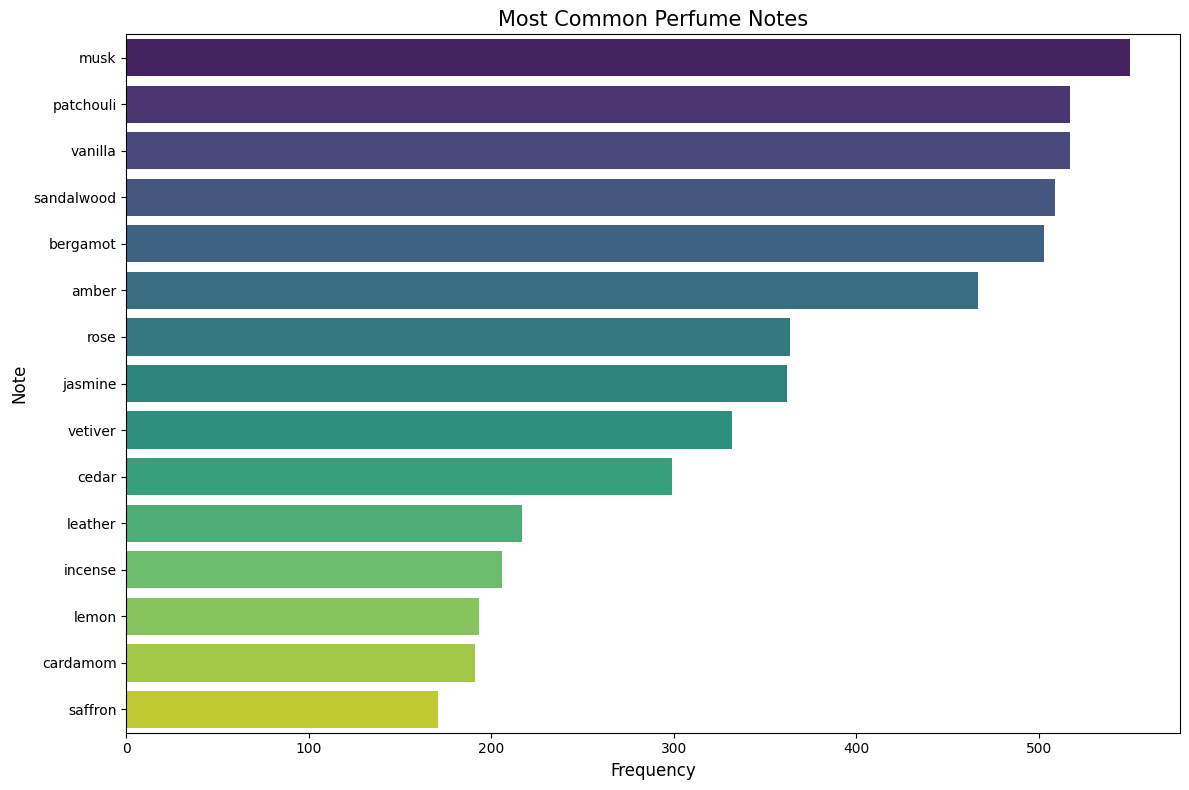

In [39]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Note', hue='Note', data=all_notes_df, palette='viridis', legend=False)
plt.title('Most Common Perfume Notes', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Note', fontsize=12)
plt.tight_layout()
plt.show()

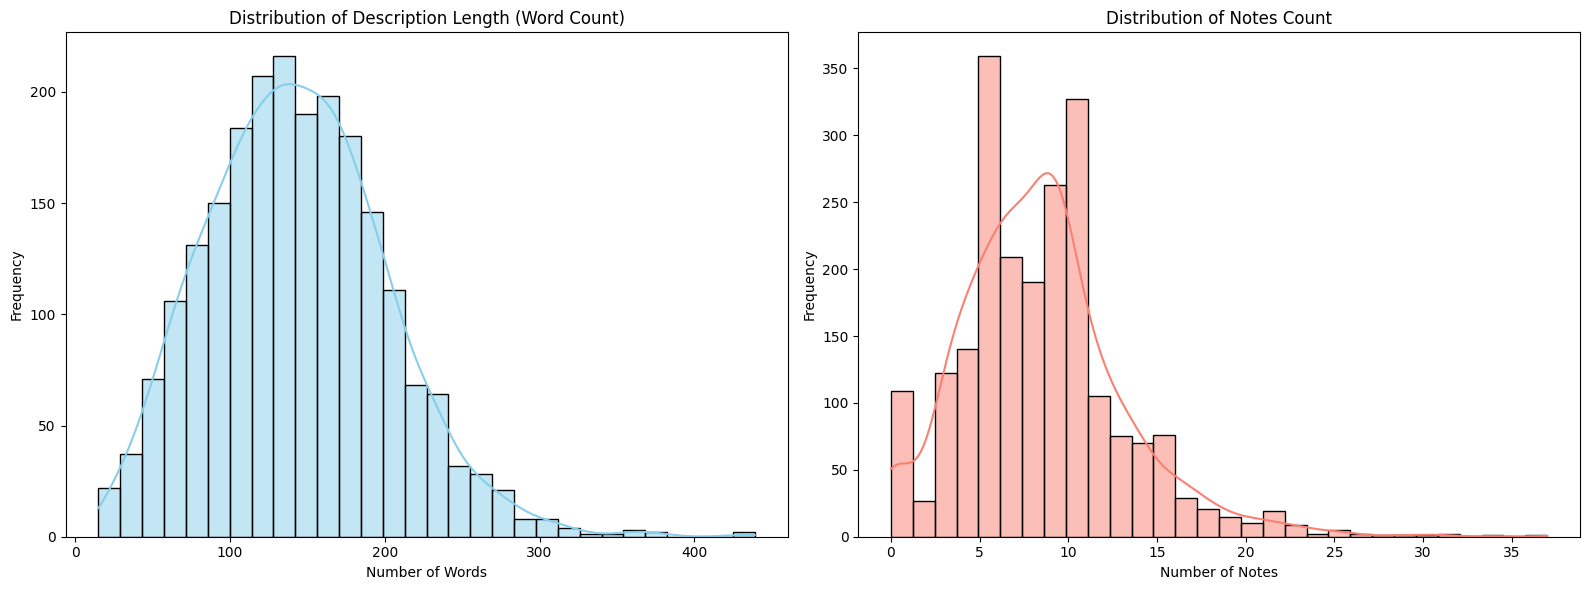

Statistics for Description Length:
count    2191.000000
mean      143.316750
std        58.233713
min        15.000000
25%       102.000000
50%       141.000000
75%       180.000000
max       439.000000
Name: Description_Length, dtype: float64

Statistics for Notes Count:
count    2191.000000
mean        8.465084
std         4.632675
min         0.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        37.000000
Name: Notes_Count, dtype: float64

Korelasi antara panjang deskripsi dan jumlah notes: 0.232


In [40]:
# Hitung panjang deskripsi dan jumlah notes
df['Description_Length'] = df['Description'].apply(lambda x: len(str(x).split()) if not pd.isna(x) else 0)
df['Notes_Count'] = df['Notes'].apply(lambda x: len(str(x).split(',')) if not pd.isna(x) else 0)

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Panjang deskripsi
sns.histplot(df['Description_Length'], kde=True, ax=axes[0], bins=30, color='skyblue')
axes[0].set_title('Distribution of Description Length (Word Count)')
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Frequency')

# Jumlah notes
sns.histplot(df['Notes_Count'], kde=True, ax=axes[1], bins=30, color='salmon')
axes[1].set_title('Distribution of Notes Count')
axes[1].set_xlabel('Number of Notes')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Statistik deskriptif
description_stats = df['Description_Length'].describe()
notes_stats = df['Notes_Count'].describe()

print("Statistics for Description Length:")
print(description_stats)
print("\nStatistics for Notes Count:")
print(notes_stats)

# Korelasi antara panjang deskripsi dan jumlah notes
correlation = df['Description_Length'].corr(df['Notes_Count'])
print(f"\nKorelasi antara panjang deskripsi dan jumlah notes: {correlation:.3f}")

# Data Preparation

In [41]:
missing_values = df.isna().sum()
print("Missing Values per Kolom:")
print(missing_values)
print(f"\nPersentase missing values pada kolom Notes: {missing_values['Notes']/len(df)*100:.2f}%")

Missing Values per Kolom:
Name                   0
Brand                  0
Description            0
Notes                 80
Image URL              0
Description_Length     0
Notes_Count            0
dtype: int64

Persentase missing values pada kolom Notes: 3.65%


In [42]:
df_clean = df.dropna(subset=['Notes']).copy()
print(f"Jumlah data setelah menghapus missing values: {len(df_clean)}")

Jumlah data setelah menghapus missing values: 2111


In [43]:
# Fungsi untuk membersihkan dan menormalisasi teks
def normalize_text(text):
    if pd.isna(text):
        return text
    
    # Konversi ke lowercase
    text = text.lower()
    
    # Hapus karakter khusus dan angka
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    
    # Hapus whitespace berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [44]:
# Terapkan normalisasi ke kolom Description dan Notes menggunakan .loc
df_clean.loc[:, 'Description_Normalized'] = df_clean['Description'].apply(normalize_text)
df_clean.loc[:, 'Notes_Normalized'] = df_clean['Notes'].apply(normalize_text)

# Contoh hasil normalisasi
print("Sebelum normalisasi:")
print(df_clean['Description'].iloc[0])
print("\nSetelah normalisasi:")
print(df_clean['Description_Normalized'].iloc[0])

Sebelum normalisasi:
 Rapa Nui for sugar, Tihota is, quite simply, The One. The One that will call to you every moment you're not smelling it, The One that you've only had hints of in other vanilla perfumes, The One that lasts and lasts, The One that has perfectly captured the essence of the pure nature of fresh vanilla beans and has harnessed it beyond your wildest dreams. It inspires obsessive devotion with its fragrance of smooth, vanilla bean pods dipped in honeyed water and left to steep. The result is the pure magic, an unbridled vanilla, sweet, raw and achingly desirable. Of course, Tihota isn't the first perfume to focus on the dark sweetness of vanilla... perfumery is filled with vanillas, but this smells like the dream of a master perfumer who was obsessed with vanilla and was finally given free rein to worship the note with no apologies. It is, without a sliver of a doubt, the finest pure vanilla we've ever had the honor of carrying, and it's so beautiful it pains us to put 

In [45]:
english_stopwords = set(stopwords.words('english'))

# Tambahkan custom stopwords yang spesifik untuk domain parfum
custom_stopwords = {'perfume', 'fragrance', 'scent', 'smell', 'notes', 'cologne', 'eau', 'de', 'parfum'}
all_stopwords = english_stopwords.union(custom_stopwords)

# Fungsi untuk tokenisasi dan menghapus stopwords
def tokenize_and_clean(text):
    if pd.isna(text):
        return []
    
    # Tokenisasi menggunakan NLTK
    tokens = word_tokenize(text)
    
    # Hapus stopwords
    tokens = [token for token in tokens if token not in all_stopwords]
    
    return tokens

In [46]:
# Terapkan tokenisasi dan stopword removal
df_clean.loc[:, 'Description_Tokens'] = df_clean['Description_Normalized'].apply(tokenize_and_clean)
df_clean.loc[:, 'Notes_Tokens'] = df_clean['Notes_Normalized'].apply(tokenize_and_clean)

# Gabungkan tokens menjadi teks bersih
df_clean.loc[:, 'Description_Clean'] = df_clean['Description_Tokens'].apply(lambda x: ' '.join(x))
df_clean.loc[:, 'Notes_Clean'] = df_clean['Notes_Tokens'].apply(lambda x: ' '.join(x))

# Contoh hasil tokenisasi dan pembersihan
print("Hasil tokenisasi dan pembersihan deskripsi parfum pertama:")
print(df_clean['Description_Tokens'].iloc[0][:20])  # Tampilkan 20 token pertama

Hasil tokenisasi dan pembersihan deskripsi parfum pertama:
['rapa', 'nui', 'sugar', 'tihota', 'quite', 'simply', 'one', 'one', 'call', 'every', 'moment', 'smelling', 'one', 'hints', 'vanilla', 'perfumes', 'one', 'lasts', 'lasts', 'one']


In [47]:
# Gabungkan deskripsi dan notes untuk representasi yang lebih kaya
df_clean['Combined_Features'] = df_clean['Description_Clean'] + ' ' + df_clean['Notes_Clean']

# Terapkan bobot yang lebih tinggi untuk notes (2x) dibandingkan deskripsi
df_clean['Weighted_Features'] = df_clean['Description_Clean'] + ' ' + df_clean['Notes_Clean'] + ' ' + df_clean['Notes_Clean']

# Contoh hasil fitur gabungan
print("Fitur gabungan untuk parfum pertama:")
print(df_clean['Combined_Features'].iloc[0][:200])  # Tampilkan 200 karakter pertama

Fitur gabungan untuk parfum pertama:
rapa nui sugar tihota quite simply one one call every moment smelling one hints vanilla perfumes one lasts lasts one perfectly captured essence pure nature fresh vanilla beans harnessed beyond wildest


# Modeling

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    min_df=2,              # Abaikan kata yang muncul di kurang dari 2 dokumen
    max_df=0.95,           # Abaikan kata yang muncul di lebih dari 95% dokumen
    max_features=5000,     # Batasi jumlah fitur (kata) maksimum
    ngram_range=(1, 2)     # Gunakan unigram dan bigram
)

# Fit dan transform pada fitur gabungan terbobot
tfidf_matrix = tfidf.fit_transform(df_clean['Weighted_Features'])

# Hitung cosine similarity antara semua parfum
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Indeks untuk memetakan kembali ke nama parfum
indices = pd.Series(df_clean.index, index=df_clean['Name']).drop_duplicates()

In [49]:
# Fungsi untuk mendapatkan rekomendasi berdasarkan nama parfum
def get_recommendations(name, cosine_sim=cosine_sim, df=df_clean, indices=indices, top_n=10):
    # Dapatkan indeks parfum yang dicari
    idx = indices[name]

    # Dapatkan skor kesamaan untuk semua parfum dengan parfum yang dicari
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Urutkan parfum berdasarkan skor kesamaan
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Dapatkan top N parfum yang paling mirip (tidak termasuk diri sendiri di indeks 0)
    sim_scores = sim_scores[1:top_n+1]

    # Dapatkan indeks parfum
    perfume_indices = [i[0] for i in sim_scores]
    similarity_scores = [i[1] for i in sim_scores]

    # Buat dataframe hasil rekomendasi
    recommendations = pd.DataFrame({
        'Name': df['Name'].iloc[perfume_indices].values,
        'Brand': df['Brand'].iloc[perfume_indices].values,
        'Notes': df['Notes'].iloc[perfume_indices].values,
        'Similarity Score': similarity_scores
    })

    return recommendations

In [50]:
# Contoh rekomendasi untuk parfum tertentu
sample_perfume = df_clean['Name'].iloc[42]  # Ambil parfum sampel
print(f"Rekomendasi untuk parfum: {sample_perfume} (Brand: {df_clean['Brand'].iloc[42]})")
print(f"Notes: {df_clean['Notes'].iloc[42]}")
print("\nRekomendasi Parfum Serupa:")
recommendations = get_recommendations(sample_perfume)
print(recommendations)

Rekomendasi untuk parfum: Purple Fig Eau de Parfum (Brand: Vilhelm Parfumerie)
Notes:  sichuan pepper, angelica seeds, galbanum, green fig, jasmine absolute, vetiver, cashmere woods

Rekomendasi Parfum Serupa:
                                    Name                Brand  \
0        Premier Figuier Eau de Toilette  L'Artisan Parfumeur   
1       Jasmin Angelique Cologne Absolue      Atelier Cologne   
2  Premier Figuier Extreme Eau de Parfum  L'Artisan Parfumeur   
3           Philosykos - Eau de Toilette             Diptyque   
4             Philosykos - Eau de Parfum             Diptyque   
5                  Ichnusa Eau de Parfum             Profumum   
6     Debaser Pocket Perfume Perfume Oil       D.S. and Durga   
7                Dark Lord Eau de Parfum            By Kilian   
8               Still Life Eau de Parfum     Olfactive Studio   
9                  Debaser Eau de Parfum       D.S. and Durga   

                                               Notes  Similarity Score  
0

# Evaluation

Statistik Cosine Similarity:
- Rata-rata: 0.0360
- Median: 0.0276
- Standar Deviasi: 0.0338
- Min: 0.0000
- Max: 1.0000


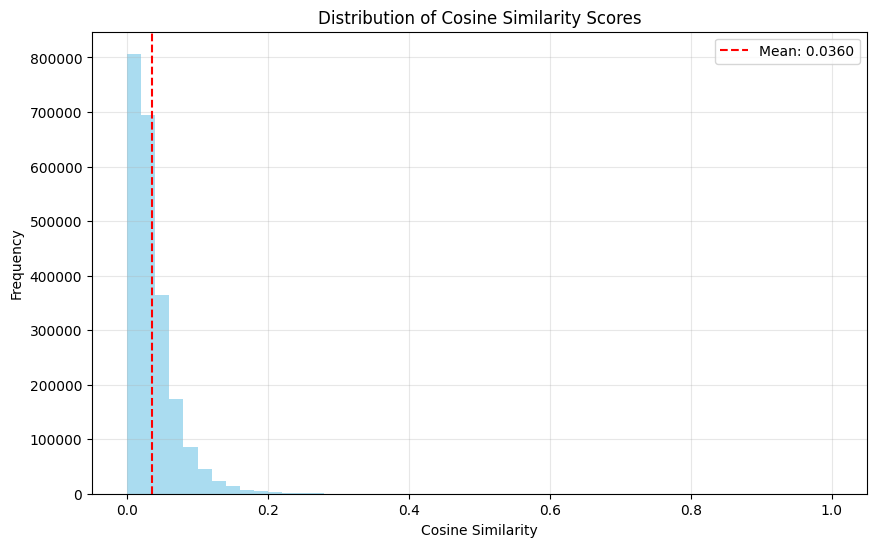

In [51]:
# Evaluasi distribusi cosine similarity scores
def analyze_similarity_distribution(cosine_sim):
    # Ambil nilai similarity dari matriks (tidak termasuk diagonal yang selalu 1)
    similarity_values = []
    n = cosine_sim.shape[0]
    for i in range(n):
        for j in range(i+1, n):  # Hanya ambil nilai di atas diagonal
            similarity_values.append(cosine_sim[i, j])
    
    # Analisis statistik
    avg_similarity = np.mean(similarity_values)
    median_similarity = np.median(similarity_values)
    std_similarity = np.std(similarity_values)
    
    print(f"Statistik Cosine Similarity:")
    print(f"- Rata-rata: {avg_similarity:.4f}")
    print(f"- Median: {median_similarity:.4f}")
    print(f"- Standar Deviasi: {std_similarity:.4f}")
    print(f"- Min: {min(similarity_values):.4f}")
    print(f"- Max: {max(similarity_values):.4f}")
    
    # Visualisasi distribusi
    plt.figure(figsize=(10, 6))
    plt.hist(similarity_values, bins=50, alpha=0.7, color='skyblue')
    plt.axvline(avg_similarity, color='red', linestyle='--', label=f'Mean: {avg_similarity:.4f}')
    plt.title('Distribution of Cosine Similarity Scores')
    plt.xlabel('Cosine Similarity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Analisis distribusi similarity
analyze_similarity_distribution(cosine_sim)

In [52]:
# Uji beberapa parfum dengan karakteristik berbeda
test_perfumes = [
    df_clean['Name'].iloc[10],   # Parfum floral
    df_clean['Name'].iloc[100],  # Parfum woody
    df_clean['Name'].iloc[200]   # Parfum citrus
]

for perfume in test_perfumes:
    print(f"\n{'='*80}")
    idx = indices[perfume]
    print(f"Parfum: {perfume} (Brand: {df_clean['Brand'].iloc[idx]})")
    print(f"Notes: {df_clean['Notes'].iloc[idx]}")
    
    recommendations = get_recommendations(perfume, top_n=5)
    print("\nRekomendasi Parfum Serupa:")
    print(recommendations)


Parfum: Nocturnal Poetry Parfum (Brand: PRIN)
Notes:  Violet, champaca, rosewood, beeswax, frankincense, myrrh, coffee bean, rose, tobacco, hay, jasmine, leather, castoreum, hyrax, civet, musk, oud, turmeric, cumin

Rekomendasi Parfum Serupa:
                                            Name            Brand  \
0                                    Homa Parfum             PRIN   
1                    Mandarava Extrait de Parfum  Parfum Prissana   
2                        Sloth Extrait de Parfum        Zoologist   
3                               Mandodari Parfum             PRIN   
4  Frankincense - Myrrh - Rose Maroc perfume oil    Regina Harris   

                                               Notes  Similarity Score  
0   Cinnamon, ginger, black pepper, cardamom, cas...          0.241168  
1   bodhi tree, borneol, jasmine sambac, Himalaya...          0.240027  
2   Chamomile, acai berry, lavender, violet leaf,...          0.207729  
3   Champaca, tuberose, gardenia, frangipani, ald

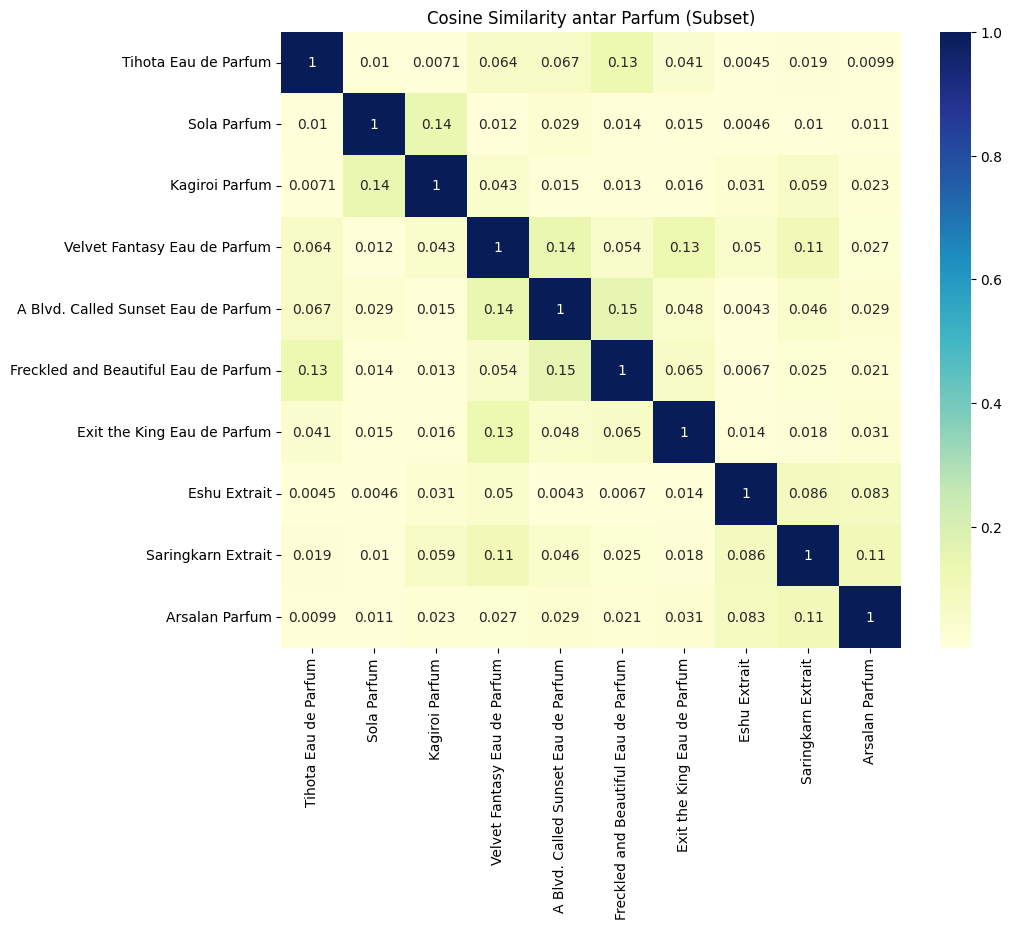

In [53]:
sample_cosine = cosine_sim[:10, :10]
plt.figure(figsize=(10, 8))
sns.heatmap(sample_cosine, xticklabels=df['Name'][:10], yticklabels=df['Name'][:10], annot=True, cmap="YlGnBu")
plt.title("Cosine Similarity antar Parfum (Subset)")
plt.xticks(rotation=90)
plt.show()